<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Install-and-load-libraries" data-toc-modified-id="Install-and-load-libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Install and load libraries</a></span></li><li><span><a href="#What-is-Prophet?" data-toc-modified-id="What-is-Prophet?-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>What is Prophet?</a></span></li><li><span><a href="#Load-and-Summarize-Dataset" data-toc-modified-id="Load-and-Summarize-Dataset-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Load and Summarize Dataset</a></span><ul class="toc-item"><li><span><a href="#Plot-the-time-series" data-toc-modified-id="Plot-the-time-series-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Plot the time series</a></span></li></ul></li><li><span><a href="#Forecast-Temperature-Anomalies-With-Prophet" data-toc-modified-id="Forecast-Temperature-Anomalies-With-Prophet-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Forecast Temperature Anomalies With Prophet</a></span><ul class="toc-item"><li><span><a href="#Prophet-Model" data-toc-modified-id="Prophet-Model-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Prophet Model</a></span><ul class="toc-item"><li><span><a href="#Fit-the-model" data-toc-modified-id="Fit-the-model-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Fit the model</a></span></li><li><span><a href="#Make-predictions" data-toc-modified-id="Make-predictions-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>Make predictions</a></span></li><li><span><a href="#Plot-components" data-toc-modified-id="Plot-components-4.1.3"><span class="toc-item-num">4.1.3&nbsp;&nbsp;</span>Plot components</a></span></li><li><span><a href="#Plot-change-points" data-toc-modified-id="Plot-change-points-4.1.4"><span class="toc-item-num">4.1.4&nbsp;&nbsp;</span>Plot change-points</a></span></li></ul></li><li><span><a href="#Manually-Evaluate-Forecast-Model" data-toc-modified-id="Manually-Evaluate-Forecast-Model-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Manually Evaluate Forecast Model</a></span><ul class="toc-item"><li><span><a href="#Calculate-MAE-and-RMSE--between-expected-and-predicted-values" data-toc-modified-id="Calculate-MAE-and-RMSE--between-expected-and-predicted-values-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Calculate MAE and RMSE  between expected and predicted values</a></span></li></ul></li><li><span><a href="#Change-hyperparameters" data-toc-modified-id="Change-hyperparameters-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Change hyperparameters</a></span><ul class="toc-item"><li><span><a href="#ChangePoints-in-Prophet" data-toc-modified-id="ChangePoints-in-Prophet-4.3.1"><span class="toc-item-num">4.3.1&nbsp;&nbsp;</span>ChangePoints in Prophet</a></span></li><li><span><a href="#Add-Seasonality" data-toc-modified-id="Add-Seasonality-4.3.2"><span class="toc-item-num">4.3.2&nbsp;&nbsp;</span>Add Seasonality</a></span></li><li><span><a href="#Adding-External-Regressors" data-toc-modified-id="Adding-External-Regressors-4.3.3"><span class="toc-item-num">4.3.3&nbsp;&nbsp;</span>Adding External Regressors</a></span></li><li><span><a href="#Adding-Holidays-or-Special-Events" data-toc-modified-id="Adding-Holidays-or-Special-Events-4.3.4"><span class="toc-item-num">4.3.4&nbsp;&nbsp;</span>Adding Holidays or Special Events</a></span></li></ul></li></ul></li><li><span><a href="#Further-materials" data-toc-modified-id="Further-materials-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Further materials</a></span></li></ul></div>

# Install and load libraries

In [ ]:
#!conda install -c conda-forge fbprophet

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
import fbprophet
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot
import pandas as pd
import plotly.express as px
import plotly.graph_objs as go
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt

# What is Prophet?

Prophet is a facebooks’ open source time series prediction. Prophet decomposes time series into trend, seasonality and holiday. It has intuitive hyper parameters which are easy to tune.

> Prophet time series = Trend + Seasonality + Holiday + error


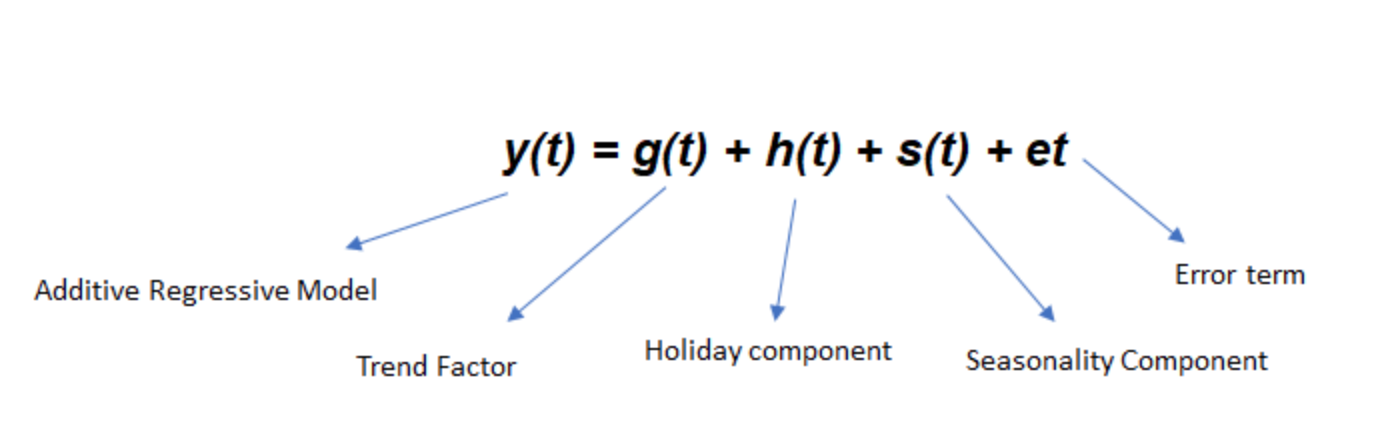

- `Trend` models non periodic changes in the value of the time series.


- `Seasonality` is the periodic changes like daily, weekly, or yearly seasonality.


- `Holiday` effect which occur on irregular schedules over a day or a period of days.


- `Error` terms is what is not explained by the model.


**Prophet Forecasting Model — It is an Additive Regressive Model**

Some of the useful functions present in the library fbprophet listed below: 

- `model.fit`: fit the model with the historical data


- `model.predict`: predict data based on given dates


- `model.plot_components`: separate the contributions of different components of the time series model and forecast


- `model.add_seasonality`: change the default seasonality


- `model.add_regressors`: add additional variables in the time series model


- `model.seasonalities`


# Load and Summarize Dataset 

In [ ]:
df = pd.read_csv('../Data/temp_clean.csv')

We can see that as we expected, there are 1668 months worth of data and two columns. The first column is the date and the second is the average temperature in Celsius.

## Plot the time series


We can clearly see the trend in average temperature over time and a monthly seasonal pattern to the temperature. These are patterns we expect the forecast model to take into account.

# Forecast Temperature Anomalies With Prophet

In this section, we will explore using the Prophet to forecast the anomalies temperature dataset.

## Prophet Model

To use Prophet for forecasting:

1. A **Prophet()** object is defined and configured,


2. Fit on the dataset by calling the **fit()** function and passing the data.


The `fit()` function takes a DataFrame of time series data. The DataFrame must have a specific format: 

1. The first column must have the name `ds` and contain the date-times. 


2. The second column must have the name `y` and contain the observations.

### Fit the model 

In [ ]:
# prepare expected column names


### Make predictions

[Here](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html) is a reference to the acceptable freq parameter aliases

In [ ]:
# We want to predict the next 50 years, so I set a period of 50. In this step I have created a dataframe with the dates of the next 50 years.


Prophet returns a large DataFrame with many interesting columns, but we subset our output to the columns most relevant to forecasting, which are:

- `ds`: the datestamp of the forecasted value


- `yhat`: the forecasted value of our metric (in Statistics, yhat is a notation traditionally used to represent the predicted values of a value y)


- `yhat_lower`: the lower bound of our forecasts


- `yhat_upper`: the upper bound of our forecasts
  
A variation in values from the output presented above is to be expected as Prophet relies on Markov chain Monte Carlo (MCMC) methods to generate its forecasts. MCMC is a stochastic process, so values will be slightly different each time.

### Plot components 

**What this plot means?**

- `X-axis`:  represents the date values (ds ) for both history and future dates.


- `Y-axis`: represents the prophet estimate for respective forecast compoent (trend, seasonality)


- `Graph1`: trend value for all dates (history and future).


- `Graph2`: yearly_seasonality a yearly profile for each day in a week based on the training data.


As we can see it is very easy to start and get a reasonable forecast model on your time series data using prophet.


In [ ]:
# uncertainty is the error of our predictions


### Plot change-points 

Changepoints are the datetime points where the time series have abrupt changes in the trajectory.

This Prophet plot does not contain all the change points, only the most important ones. If you want to view all of them you could use the following code:

In [ ]:
# Listing all the change points in the model



## Manually Evaluate Forecast Model

It is critical to develop an objective estimate of a forecast model’s performance.

This can be achieved by holding some data back from the model, such as the last 12 years. Then, fitting the model on the first portion of the data, using it to make predictions on the held-pack portion, and calculating an error measure, such as the mean absolute error across the forecasts. E.g. a simulated out-of-sample forecast.

The score gives an estimate of how well we might expect the model to perform on average when making an out-of-sample forecast.

We can do this with the samples data by creating a new DataFrame for training with the last 12 months removed.

In [ ]:
# create train dataset, remove last 12 months


### Calculate MAE and RMSE  between expected and predicted values

In [ ]:
# calculate MAE between expected and predicted values for december


## Change hyperparameters

### ChangePoints in Prophet

Changepoints are the datetime points where the time series have abrupt changes in the trajectory.

By default, Prophet adds 25 changepoints to the initial 80% of the data-set in order to have plenty of runway for projecting the trend forward and to avoid overfitting fluctuations at the end of the time series. 

Let’s plot the vertical lines where the potential changepoints occurred 

We can change the inferred changepoint range by setting the `changepoint_range`

By default, Prophet will automatically detect these changepoints and will allow the trend to adapt appropriately.

However, if we wish to have finer control over this process (e.g., Prophet missed a rate change, or is overfitting rate changes in the history), then we can use `changepoint_range` method

### Add Seasonality

In Prophet we can model custom seasonalities using the functions `Prophet.add_seasonality`.

By default Prophet automatically models a additive daily, weekly, yearly seasonalities based on available training data.

We can get the details of inferred seasonalities using the function Prophet.seasonalities

Let us now use the above method to model a monthly seasonality.

The Fourier order determines how quickly the seasonality can change (Default order for yearly seasonality is 10, for weekly seasonality order is 3). 

Increasing this Fourier order allows the seasonality to fit faster-changing cycles ( We need to be very careful while setting this parameter as it can lead to overfitting)

### Adding External Regressors 

**NOTE**: In this example we dont have external regressors, so the code below is not applicable to this example. 

Till now the prophet model is not able to model some of points in the training data. We know that these values deviate from the regular value because of the external regressors (regr1, regr2).

Let us now see how to capture these values and model them.


- Similar to seasonalities prophet also has a way to capture/model external factors which have an effect on the target value using the function Prophet.add_regressors.


- In the sample data we are using we have mentioned that there are two external regressors which are effecting the target value.


- In order to model and predict the regressor effects, both the training and prediction dataframes should contain the regressor data.


- Let us now see how to model these regressors using the above function.


**Note** : The regressor’s should be numeric values, you will have to perform one hot encoding if the regressor contains string data.

In [ ]:
model3 = Prophet()
model3.add_regressor('regr1') # regr1 is a variable that we know is important for our data

In [ ]:
# fit and predcit


### Adding Holidays or Special Events

Holidays and events can cause changes to a time series. 

We can create a custom holiday list for Prophet by creating a dataframe with two columns ds and holiday. A row for each occurrence of the holiday


`lower window` and `upper window` extend holiday to days around the date. 

- If we want to include a day prior to the temp season day, we set: 
   > lower_window: -1 upper_window: 0
   
- If we wanted to use the day after the holiday then set: 

    > lower_window: 0 upper_window: 1

# Further materials

- [How does Prophet work? Part-1](https://medium.com/analytics-vidhya/how-does-prophet-work-44addaab6148)


- [How does Prophet work? Part-2](https://medium.com/analytics-vidhya/how-does-prophet-work-part-2-c47a6ceac511)


- [Prophet facebook-changing hyperparameters](https://towardsdatascience.com/facebook-prophet-for-time-series-forecasting-in-python-part1-d9739cc79b1d)


- [Complete example of time series analysis](https://futurice.com/blog/business-forecasting-with-facebook-prophet)


- [Understanding ChangePoints I](https://pythondata.com/forecasting-time-series-data-prophet-trend-changepoints/)


- [Understanding ChangePoints II](https://www.kaggle.com/gauravduttakiit/trend-changepoints-using-facebook-prophet)